## **5. 추정과 가설 검정**
	
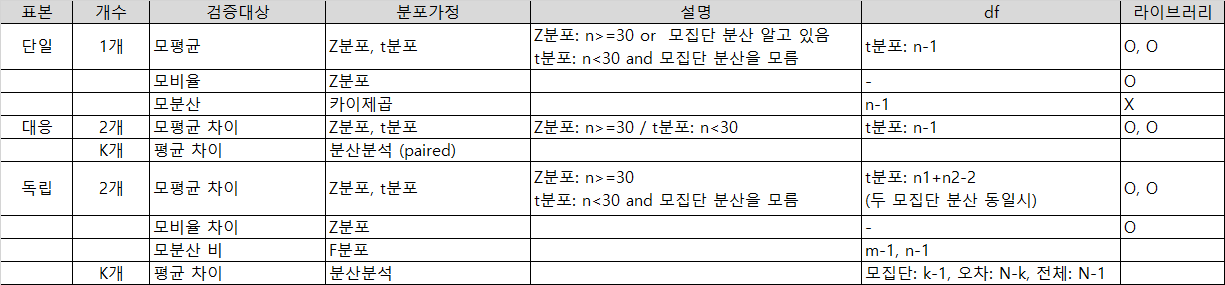

### **5-1. 일표본 (one-sample)**

#### 모평균의 추정과 가설 검정: Z분포, t분포
- Z분포: 표본의 크기가 30 이상이거나 모집단의 분산을 아는 경우
- t분포: 표본의 크기가 30 미만이고 모집단의 분산을 모르는 경우

In [5]:
import numpy as np
### 모표준편차를 아는 경우의 추정
# 모평균의 추정 
x = 31100 #표본평균
n = 36 #표본크기
sigma = 4500 #모표준편차
conf_a = 0.05 #신뢰수준(confidence level) 95% 기준

from scipy.stats import norm #표준정규분포 Z를 사용
SE = sigma / np.sqrt(n) #표준오차(standard error)
conf_z = norm.ppf(1-conf_a/2) #신뢰계수(confidence coefficient)  # or norm.ppf(conf_a/2)
ME = conf_z * SE #오차의 한계 = 허용오차(ME: margin of error)

print("[추정]")
print(" 점 추정량: {:.3f}".format(x))
print(" 구간 추정량: {:.3f}~{:.3f}".format(x-ME, x+ME))
print(" 오차의 한계: {:.3f}".format(ME))

[추정]
 점 추정량: 31100.000
 구간 추정량: 29630.027~32569.973
 오차의 한계: 1469.973


In [6]:
# 오차의 한계에 따른 표본 규모
# (위의 조건에 이어서) 오차의 한계가 500 이하일 확률이 0.95가 되도록 모집단 평균의 추정치를 원하는 경우, 표본 규모는 얼마가 되어야 하는가?
ME = 500
conf_a = 1-0.95 #신뢰수준(confidence level) 95% 기준
conf_z = norm.ppf(conf_a/2) #혹은 norm.ppf(1-conf_a/2)
ssize = conf_z**2 * sigma**2 / ME**2
print("[표본 규모]")
print(" 유의수준 {:.2f}에서 오차의 한계를 {} 이하로 하려면: 표본 규모 {:.1f} 이상".format(conf_a, ME, ssize))

[표본 규모]
 유의수준 0.05에서 오차의 한계를 500 이하로 하려면: 표본 규모 311.2 이상


In [7]:
# 모평균의 가설 검정
# H0: mu = mu0, # H1: mu != mu0
x = 31100 #표본평균
n = 36 #표본크기
sigma = 4500 #모표준편차
mu0 = 30000 #귀무가설의 모평균
test_a = 0.05 #가설검정을 위한 유의수준

SE = sigma / np.sqrt(n) #standard error
zstat = (x - mu0)/SE #검정통계량

#단측(one)/양측(two)검정에 따른 유의확률과 임계값
ways = 'two' #'two', 'one-right', 'one-left' #대립가설기준
if ways == 'two': 
    sp = (1-norm.cdf(np.abs(zstat)))*2 #significance probability
    cv = norm.ppf(1-test_a/2) #critical value
    cv = "+/-{:.3f}".format(cv)
elif ways == 'one-right':
    sp = 1-norm.cdf(zstat)
    cv = norm.ppf(1-test_a)
    cv = "{:.3f}".format(cv)
elif ways == 'one-left':
    sp = norm.cdf(zstat)
    cv = norm.ppf(test_a)
    cv = "{:.3f}".format(cv)

print("[검정]") # 귀무가설을 기각할 수 없음!
print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, zstat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))

[검정]
 임계값: +/-1.960, 검정통계량: 1.467
 유의수준: 0.050, 유의확률: 0.142


In [8]:
### 모표준편차를 모르는 경우
# 모평균의 추정
x = 650 #표본평균
n = 16 #표본크기
s = 55 #표본표준편차
conf_a = 0.05 #신뢰수준(confidence level) 95% 기준
df = n-1

from scipy.stats import t
SE = s / np.sqrt(n)
conf_t = t.ppf(1-conf_a/2, df)
ME = conf_t * SE 

print("[추정]")
print(" 점 추정량: {:.3f}".format(x))
print(" 구간 추정량: {:.3f}~{:.3f}".format(x-ME, x+ME))
print(" 오차의 한계: {:.3f}".format(ME))

[추정]
 점 추정량: 650.000
 구간 추정량: 620.693~679.307
 오차의 한계: 29.307


In [9]:
# 오차의 한계에 따른 표본 규모
# (위의 조건에 이어서) 오차의 한계가 20 이하일 확률이 0.95가 되도록 모집단 평균의 추정치를 원하는 경우, 표본 규모는 얼마가 되어야 하는가?
ME2 = 20
conf_a2 = 1-0.95 #신뢰수준(confidence level) 95% 기준
conf_t2 = t.ppf(conf_a2/2, df)
ssize = conf_t2**2 * s**2 / ME2**2
print("[표본 규모]")
print(" 유의수준 {:.2f}에서 오차의 한계를 {:.2f} 이하로 하려면: 표본 크기 {:.1f} 이상".format(conf_a2, ME2, ssize))

[표본 규모]
 유의수준 0.05에서 오차의 한계를 20.00 이하로 하려면: 표본 크기 34.4 이상


In [10]:
# 모평균의 가설 검정 (= one-sample t-test)
# H0: mu = mu0, # H1: mu > mu0
mu0 = 600 #귀무가설의 모평균
test_a = 0.05 #가설검정을 위한 유의수준
x = 650 #표본평균
n = 16 #표본크기
s = 55 #표본표준편차
df = n-1 #자유도

SE = s / np.sqrt(n) 
tstat = (x - mu0)/SE 

#단측(one)/양측(two)검정에 따른 유의확률과 임계값
ways = 'one-right' #'two', 'one-right(mu>mu0)', 'one-left(mu<mu0)'
if ways == 'two': 
    sp = (1-t.cdf(np.abs(tstat), df))*2
    cv = t.ppf(1-test_a/2, df)
    cv = "+/-{:.3f}".format(cv)
elif ways == 'one-right':
    sp = 1-t.cdf(tstat, df)
    cv = t.ppf(1-test_a, df)
    cv = "{:.3f}".format(cv)
elif ways == 'one-left':
    sp = t.cdf(tstat, df)
    cv = t.ppf(test_a, df)
    cv = "{:.3f}".format(cv)

print("[검정]") # 귀무가설을 기각!
print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, tstat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))

[검정]
 임계값: 1.753, 검정통계량: 3.636
 유의수준: 0.050, 유의확률: 0.001


#### 모비율의 추정과 가설검정: Z분포

In [11]:
# 모비율의 추정
n = 500 #표본 크기
p = 220/500 #표본 비율
conf_a = 0.05
from scipy.stats import norm
SE = np.sqrt(p*(1-p)/n) #표본비율로 SE 계산
conf_z = norm.ppf(1-conf_a/2)
ME = conf_z * SE
print("[추정]")
print(" 점 추정량: {:.3f}".format(p))
print(" 구간 추정량: {:.3f}~{:.3f}".format(p-ME, p+ME))
print(" 오차의 한계: {:.3f}".format(ME))

[추정]
 점 추정량: 0.440
 구간 추정량: 0.396~0.484
 오차의 한계: 0.044


In [12]:
# 표본규모 계산: 모비율 P를 아는 경우에는 P를 사용, 아니면 표본비율 p로 계산, 두 정보 모두 없다면 p=0.5로 계산 
# (위의 조건에 이어서) 오차의 한계가 0.03 이하일 확률이 0.99가 되도록 모집단 비율의 추정치를 원하는 경우, 표본 규모는 얼마가 되어야 하는가?
ME2 = 0.03
conf_a2 = 1-0.99 #신뢰수준 99%
conf_z2 = norm.ppf(1-conf_a2/2)
ssize = conf_z2**2 * p * (1-p) / ME2**2
print("[표본 규모]")
print(" 유의수준 {:.2f}에서 오차의 한계를 {:.2f} 이하로 하려면: 표본 크기 {:.1f} 이상".format(conf_a2, ME2, ssize))

[표본 규모]
 유의수준 0.01에서 오차의 한계를 0.03 이하로 하려면: 표본 크기 1816.5 이상


In [13]:
# 모비율의 가설검정
# H0: P = P0, H1: P != P0
n = 500 #표본 크기
p = 220/500 #표본 비율
P0 = 0.5 #귀무가설의 모비율
test_a = 0.05
SE = np.sqrt(P0*(1-P0)/n) #귀무가설의 모비율로 SE 계산
zstat = (p - P0)/SE

#단측(one)/양측(two)검정에 따른 유의확률과 임계값
ways = 'two' #'two', 'one-right(P>P0)', 'one-left(P<P0)' #대립가설기준
if ways == 'two': 
    sp = (1-norm.cdf(np.abs(zstat)))*2
    cv = norm.ppf(1-test_a/2)
    cv = "+/- {:.3f}".format(cv)
elif ways == 'one-right':
    sp = 1-norm.cdf(zstat)
    cv = norm.ppf(1-test_a)
    cv = "{:.3f}".format(cv)
elif ways == 'one-left':
    sp = norm.cdf(zstat)
    cv = norm.ppf(test_a)
    cv = "{:.3f}".format(cv)
print("[검정]") # 귀무가설 기각!
print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, zstat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))

[검정]
 임계값: +/- 1.960, 검정통계량: -2.683
 유의수준: 0.050, 유의확률: 0.007


#### 모분산의 추정과 가설 검정: 카이제곱분포

In [14]:
### 모평균을 모르는 경우
# 모분산의 추정
n = 10 #표본 크기
v = 3.4 #표본 분산
df = n-1 # 자유도 (degree of freedom)
conf_a = 0.05 #신뢰수준 95%

from scipy.stats import chi2
conf_c1 = chi2.ppf(1-conf_a/2, df)
conf_c2 = chi2.ppf(conf_a/2, df)
CR1 = df * v / conf_c1 #confidence range
CR2 = df * v / conf_c2 #confidence range

print("[추정]")
print(" 점 추정량: {:.3f}".format(v))
print(" 구간 추정량: {:.3f}~{:.3f}".format(CR1, CR2))

[추정]
 점 추정량: 3.400
 구간 추정량: 1.609~11.332


In [16]:
# 가설검정 (왼쪽 검정)
# H0: sigma^2 = v0, H1: sigma^2 < v0
n = 10 #표본 크기
v = 3.4 #표본 분산
df = n-1 # 자유도 (degree of freedom)
v0 = 3.6 #귀무가설의 모분산
test_a = 0.05

cstat = df * v / v0 #카이제곱통계량

# 단측(one)/양측(two)검정에 따른 유의확률과 임계값
ways = 'one-left' #'two', 'one-right(sigma^2>v0)', 'one-left(sigma^2<v0)'
if ways == 'two':
    if chi2.cdf(cstat, df) < 0.5:
        sp = (chi2.cdf(cstat, df))*2
    else:
        sp = (1-chi2.cdf(cstat, df))*2
    cv1 = chi2.ppf(test_a/2, df)
    cv2 = chi2.ppf(1-test_a/2, df)
    cv = "{:.3f}와 {:.3f}".format(cv1, cv2)
elif ways == 'one-right':
    sp = 1-chi2.cdf(cstat, df)
    cv = chi2.ppf(1-test_a, df)
    cv = "{:.3f}".format(cv)
elif ways == 'one-left':
    sp = chi2.cdf(cstat, df)
    cv = chi2.ppf(test_a, df)
    cv = "{:.3f}".format(cv)

print("[검정]") # 귀무가설을 기각할 수 없음!
print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, cstat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))

[검정]
 임계값: 3.325, 검정통계량: 8.500
 유의수준: 0.050, 유의확률: 0.515


### **5-2. 이표본 (Two-sample)**

#### 독립표본 모평균 차이의 추정과 가설 검정: Z분포, t분포
- Z분포: 표본 크기 30 이상 & 모집단의 분산을 아는 경우  
         표본 크기 30 이상 & 모집단의 분산을 모르는 경우  
- t분포: 표본 크기 30 미만 & 모집단의 분산을 모르지만 두 모집단의 분산이 동일한 경우  
         표본 크기 30 미만 & 모집단의 분산을 모르지만 두 모집단의 분산이 다른 경우  

In [17]:
### 표본의 크기가 30이상이고 모집단의 분산을 아는 경우
# 독립표본 모평균 차이의 추정 
from scipy.stats import norm
import numpy as np
x1 = 78 #1번 모집단의 표본평균
x2 = 70 #2번 모집단의 표본평균
sigma1 = 4.8 #1번 모표준편차
sigma2 = 3.1 #2번 모표준편차
n1 = 16 #1번 표본 크기
n2 = 25 #2번 표본 크기
conf_a = 0.05 # 신뢰수준 95%

d = x1 - x2 # 두 모평균의 차이에 대한 점추정 값
SE = np.sqrt(sigma1**2/n1 + sigma2**2/n2)
conf_z = norm.ppf(1-conf_a/2)
ME = conf_z * SE

print("[추정]")
print(" 점 추정량: {:.3f}".format(d))
print(" 구간 추정량: {:.3f}~{:.3f}".format(d-ME, d+ME))
print(" 오차의 한계: {:.3f}".format(ME))

[추정]
 점 추정량: 8.000
 구간 추정량: 5.353~10.647
 오차의 한계: 2.647


In [18]:
# 독립표본 모평균 차이의 가설검정
# H0: 모평균의 차 = D0, H1: 모평균의 차 != D0
test_a = 0.05
d0=0
d = x1 - x2
df = n1+n2-2
SE = np.sqrt(sigma1**2/n1 + sigma2**2/n2)
zstat = (x1-x2-d0)/SE

#단측(one)/양측(two)검정에 따른 유의확률과 임계값
ways = 'two' #'two', 'one-right(H1: 모평균의 차>D0)', 'one-left(H1: 모평균의 차<D0)'
if ways == 'two': 
    sp = (1-norm.cdf(np.abs(zstat)))*2
    cv = norm.ppf(1-test_a/2)
    cv = "+/- {:.3f}".format(cv)
elif ways == 'one-right':
    sp = 1-norm.cdf(zstat)
    cv = norm.ppf(1-test_a)
    cv = "{:.3f}".format(cv)
elif ways == 'one-left':
    sp = norm.cdf(zstat)
    cv = norm.ppf(test_a)
    cv = "{:.3f}".format(cv)

print("[검정]") # 귀무가설 기각할 수 있음
print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, zstat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))

[검정]
 임계값: +/- 1.960, 검정통계량: 5.923
 유의수준: 0.050, 유의확률: 0.000


In [19]:
### 표본의 크기가 30 미만이고 모집단의 분산을 모르지만 같다는 것을 알고 있을 경우
# 독립표본 모평균 차이의 추정
from scipy.stats import t
x1 = 85 #1번 모집단의 표본평균
x2 = 81 #2번 모집단의 표본평균
s1 = 4 #1번 표본표준편차
s2 = 5 #2번 표본표준편차
n1 = 12 #1번 표본 크기
n2 = 10 #2번 표본 크기
conf_a = 0.05 # 신뢰수준 95%

d = x1 - x2
df = n1+n2-2 #자유도
pv = (s1**2*(n1-1) + s2**2*(n2-1)) / df #합동 분산 (pooled variance)
SE = np.sqrt(pv) * np.sqrt(1/n1 + 1/n2)
conf_t = t.ppf(1-conf_a/2, df) # t분포 활용
ME = conf_t * SE

print("[추정]")
print(" 점 추정량: {:.3f}".format(d))
print(" 구간 추정량: {:.3f}~{:.3f}".format(d-ME, d+ME))
print(" 오차의 한계: {:.3f}".format(ME))
print(" 합동분산: {:.2f}".format(pv))

[추정]
 점 추정량: 4.000
 구간 추정량: 0.001~7.999
 오차의 한계: 3.999
 합동분산: 20.05


In [20]:
# 독립표본 모평균 차이의 가설검정
# H0: 모평균의 차 = D0, H1: 모평균의 차 != D0
test_a = 0.05
d0 = 0
d = x1 - x2
df = n1+n2-2
pv = (s1**2*(n1-1) + s2**2*(n2-1)) / df
SE = np.sqrt(pv) * np.sqrt(1/n1 + 1/n2)
tstat = (x1-x2-d0)/SE

#단측(one)/양측(two)검정에 따른 유의확률과 임계값
ways = 'two' #'two', 'one-right(H1: 모평균의 차>D0)', 'one-left(H1: 모평균의 차<D0)'
if ways == 'two': 
    sp = (1-t.cdf(np.abs(tstat), df))*2
    cv = t.ppf(1-test_a/2, df)
    cv = "+/- {:.3f}".format(cv)
elif ways == 'one-right':
    sp = 1-t.cdf(tstat, df)
    cv = t.ppf(1-test_a, df)
    cv = "{:.3f}".format(cv)
elif ways == 'one-left':
    sp = t.cdf(tstat, df)
    cv = t.ppf(test_a, df)
    cv = "{:.3f}".format(cv)
    
print("[검정]") # 귀무가설 기각할 수 있음
print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, tstat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))

[검정]
 임계값: +/- 2.086, 검정통계량: 2.086
 유의수준: 0.050, 유의확률: 0.050


In [21]:
### 표본의 크기가 30 미만이고 모집단의 분산을 모르지만 다르다고 알고 있을 경우
# 독립표본 모평균 차이의 추정
from scipy.stats import t
x1 = 85 #1번 모집단의 표본평균
x2 = 81 #2번 모집단의 표본평균
s1 = 4 #1번 표본표준편차
s2 = 5 #2번 표본표준편차
n1 = 12 #1번 표본 크기
n2 = 10 #2번 표본 크기
conf_a = 0.05 # 신뢰수준 95%

d = x1 - x2
df = ((s1**2)/n1 + (s2**2)/n2)**2 / (1/(n1-1)*((s1**2)/n1)**2 + 1/(n2-1)*((s2**2)/n2)**2)
SE = np.sqrt(s1**2/n1 + s2**2/n2)
conf_t = t.ppf(1-conf_a/2, df)
ME = conf_t * SE

print("[추정]")
print(" 점 추정량: {:.3f}".format(d))
print(" 구간 추정량: {:.3f}~{:.3f}".format(d-ME, d+ME))
print(" 오차의 한계: {:.3f}".format(ME))
print(" 자유도: {:.2f}".format(df))

[추정]
 점 추정량: 4.000
 구간 추정량: -0.128~8.128
 오차의 한계: 4.128
 자유도: 17.17


In [22]:
# 독립표본 모평균 차이의 가설검정
# H0: 모평균의 차 = D0, H1: 모평균의 차 != D0
test_a = 0.05
d0 = 0
d = x1 - x2
df = ((s1**2)/n1 + (s2**2)/n2)**2 / (1/(n1-1)*((s1**2)/n1)**2 + 1/(n2-1)*((s2**2)/n2)**2)
SE = np.sqrt(s1**2/n1 + s2**2/n2)
tstat = (x1-x2-d0)/SE

#단측(one)/양측(two)검정에 따른 유의확률과 임계값
ways = 'two' #'two', 'one-right(H1: 모평균 차>D0)', 'one-left(H1: 모평균 차<D0)'
if ways == 'two': 
    sp = (1-t.cdf(np.abs(tstat), df))*2
    cv = t.ppf(1-test_a/2, df)
    cv = "+/- {:.3f}".format(cv)
elif ways == 'one-right':
    sp = 1-t.cdf(tstat, df)
    cv = t.ppf(1-test_a, df)
    cv = "{:.3f}".format(cv)
elif ways == 'one-left':
    sp = t.cdf(tstat, df)
    cv = t.ppf(test_a, df)
    cv = "{:.3f}".format(cv)
print("[검정]") # 귀무가설을 기각할 수 없음!
print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, tstat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))

[검정]
 임계값: +/- 2.108, 검정통계량: 2.043
 유의수준: 0.050, 유의확률: 0.057


In [23]:
# 라이브러리를 통한 독립표본 t-test
from scipy.stats import ttest_ind
X1 = [1,3,5,7,9]
X2 = [9,11,13,15]

# equal_var: 모집단의 분산이 동일한지 여부
# alternative: 대립가설의 형태 'two-sided', 'less', 'greater'
tstat, p = ttest_ind(X1, X2, equal_var = True, alternative='two-sided') 
print("[라이브러리 검정] equal_var = True, alternative='two-sided'")
print(" 검정통계량: {:.3f}, 유의확률: {:.3f}\n".format(tstat, p))

tstat, p = ttest_ind(X1, X2, equal_var = False, alternative='two-sided')
print("[라이브러리 검정] equal_var = False, alternative='two-sided'")
print(" 검정통계량: {:.3f}, 유의확률: {:.3f}".format(tstat, p))
# 두 경우 모두 귀무가설을 기각 할 수 있다.

[라이브러리 검정] equal_var = True, alternative='two-sided'
 검정통계량: -3.564, 유의확률: 0.009

[라이브러리 검정] equal_var = False, alternative='two-sided'
 검정통계량: -3.656, 유의확률: 0.008


#### 대응표본 모평균 차이의 추정과 가설 검정: Z분포, t분포
- Z분포: 표본 크기 30 이상 / t분포: 표본 크기 30 미만

In [24]:
### 표본의 크기가 30미만인 경우
# 대응표본 모평균 차이의 추정
from scipy.stats import t
import numpy as np
x1 = np.array([75, 83, 96, 77, 81, 90, 82, 67, 94, 85, 78, 82, 96, 80, 87, 81])
x2 = np.array([80, 90, 92, 75, 86, 90, 81, 70, 89, 88, 82, 79, 91, 90, 78, 89])
n = len(x1)
df = n-1
conf_a = 0.05

d = x1 - x2 #두 데이터의 차이
d_mean = np.mean(d) #두 데이터 차이의 평균
d_std = np.sqrt(1/df * sum((d-d_mean)**2)) #두 데이터 차이의 표준편차
SE = d_std / np.sqrt(n)
conf_t = t.ppf(1-conf_a/2, df)
ME = conf_t * SE

print("[추정]")
print(" 점 추정량: {:.3f}".format(d_mean))
print(" 구간 추정량: {:.3f}~{:.3f}".format(d_mean-ME, d_mean+ME))
print(" 오차의 한계: {:.3f}".format(ME))

[추정]
 점 추정량: -1.000
 구간 추정량: -3.893~1.893
 오차의 한계: 2.893


In [25]:
# 대응표본 모평균 차이의 가설검정
# H0: 모평균의 차 = D0, H1: 모평균의 차 != D0
test_a = 0.05
d0 = 0
d = x1 - x2
d_mean = np.mean(d)
d_std = np.sqrt(1/df * sum((d-d_mean)**2))
SE = d_std / np.sqrt(n)
tstat = (d_mean - d0) / SE

#단측(one)/양측(two)검정에 따른 유의확률과 임계값
ways = 'two' #'two', 'one-right(H1: 모평균의 차>D0)', 'one-left(H1: 모평균의 차<D0)'
if ways == 'two': 
    sp = (1-t.cdf(np.abs(tstat), df))*2
    cv = t.ppf(1-test_a/2, df)
    cv = "+/- {:.3f}".format(cv)
elif ways == 'one-right':
    sp = 1-t.cdf(tstat, df)
    cv = t.ppf(1-test_a, df)
    cv = "{:.3f}".format(cv)
elif ways == 'one-left':
    sp = t.cdf(tstat, df)
    cv = t.ppf(test_a, df)
    cv = "{:.3f}".format(cv)
    
print("[검정]") # 귀무가설을 기각할 수 없음!
print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, tstat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))

[검정]
 임계값: +/- 2.131, 검정통계량: -0.737
 유의수준: 0.050, 유의확률: 0.473


In [26]:
from scipy.stats import ttest_rel
tstat, p = ttest_rel(x1, x2, alternative='two-sided')
print("[라이브러리 검정]")
print(" 검정통계량: {:.3f}, 유의확률: {:.3f}".format(tstat, p))

[라이브러리 검정]
 검정통계량: -0.737, 유의확률: 0.473


In [27]:
### 표본의 크기가 30이상인 경우
# 대응표본 모평균 차이의 추정
from scipy.stats import norm
import numpy as np
np.random.seed(0) # 랜덤 시드 고정
x1 = np.random.randint(80, 100, 40) # 80~100 사이의 숫자를 랜덤으로 40개 추출
x2 = np.random.randint(80, 100, 40) # 80~100 사이의 숫자를 랜덤으로 40개 추출
n = len(x1)
df = n-1
conf_a = 0.05

d = x1 - x2 #두 데이터의 차이
d_mean = np.mean(d) #두 데이터 차이의 평균
d_std = np.sqrt(1/df * sum((d-d_mean)**2)) #두 데이터 차이의 표준편차
SE = d_std / np.sqrt(n)
conf_z = norm.ppf(1-conf_a/2)
ME = conf_z * SE

print("[추정]")
print(" 점 추정량: {:.3f}".format(d_mean))
print(" 구간 추정량: {:.3f}~{:.3f}".format(d_mean-ME, d_mean+ME))
print(" 오차의 한계: {:.3f}".format(ME))

[추정]
 점 추정량: 2.275
 구간 추정량: -0.506~5.056
 오차의 한계: 2.781


In [28]:
# 대응표본 모평균 차이의 가설검정
# H0: 모평균의 차 = D0, H1: 모평균의 차 != D0
test_a = 0.05
d0 = 0
d = x1 - x2
d_mean = np.mean(d)
d_std = np.sqrt(1/df * sum((d-d_mean)**2))
SE = d_std / np.sqrt(n)
zstat = (d_mean - d0) / SE

#단측(one)/양측(two)검정에 따른 유의확률과 임계값
ways = 'two' #'two', 'one-right(H1: 모평균의 차>D0)', 'one-left(H1: 모평균의 차<D0)'
if ways == 'two': 
    sp = (1-norm.cdf(np.abs(zstat)))*2
    cv = norm.ppf(1-test_a/2)
    cv = "+/- {:.3f}".format(cv)
elif ways == 'one-right':
    sp = 1-norm.cdf(zstat)
    cv = norm.ppf(1-test_a)
    cv = "{:.3f}".format(cv)
elif ways == 'one-left':
    sp = norm.cdf(zstat)
    cv = norm.ppf(test_a)
    cv = "{:.3f}".format(cv)
    
print("[검정]") # 귀무가설을 기각할 수 없음!
print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, zstat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))

[검정]
 임계값: +/- 1.960, 검정통계량: 1.604
 유의수준: 0.050, 유의확률: 0.109


In [29]:
from scipy.stats import ttest_rel
tstat, p = ttest_rel(x1, x2, alternative='two-sided')
print("[라이브러리 검정]")
print(" 검정통계량: {:.3f}, 유의확률: {:.3f}".format(tstat, p)) 

## 표본의 크기가 30이상인 경우, t분포 대신 z분포를 사용할 수 있다. 윗 블럭의 [검정]은 z분포를 사용한 결과이고, [라이브러리 검정]은 t분포를 사용한 결과인데 검정통계량은 동일하고 유의확률은 약간의 차이를 보이는 것을 알 수 있다.

[라이브러리 검정]
 검정통계량: 1.604, 유의확률: 0.117


#### 모비율 차이의 추정과 가설 검정: Z분포

In [30]:
# 독립표본 모비율 차이의 추정
n1 = 250 # 캠페인 후의 인지도 (관심 있는 대상)
p1 = 120/250
n2 = 150 # 캠페인 전의 인지도
p2 = 60/150
conf_a = 0.05

from scipy.stats import norm
d = p1 - p2
conf_z = norm.ppf(1-conf_a/2)
SE1 = np.sqrt( p1*(1-p1)/n1 + p2*(1-p2)/n2 )  #대표본 근사 분산을 사용한 SE
ME1 = conf_z * SE1

print("[추정]")
print(" 점 추정량: {:.3f}".format(d))
print(" 구간 추정량: {:.3f}~{:.3f}".format(d-ME1, d+ME1))
print(" 오차의 한계: {:.3f}".format(ME1))

[추정]
 점 추정량: 0.080
 구간 추정량: -0.020~0.180
 오차의 한계: 0.100


In [31]:
# 독립표본 모비율 차이의 가설 검정
# H0: 모비율의 차 = D0, H1: 모비율의 차 > D0  *캠페인 후의 인지도가 증가 여부를 검정
test_a = 0.05
d0 = 0

pe = (n1*p1+n2*p2) / (n1+n2) #합동표본비율
SE2 = np.sqrt( pe*(1-pe)*(1/n1+1/n2)) # 합동 분산을 사용한 SE
zstat = (d-d0) / SE2 #검정통계량

#단측(one)/양측(two)검정에 따른 유의확률과 임계값
ways = 'one-right' #'two', 'one-right(H1:모비율 차>D0)', 'one-left(H1:모비율 차<D0)'
if ways == 'two': 
    sp = (1-norm.cdf(np.abs(zstat)))*2
    cv = norm.ppf(1-test_a/2)
    cv = "+/-{:.3f}".format(cv)
elif ways == 'one-right':
    sp = 1-norm.cdf(zstat)
    cv = norm.ppf(1-test_a)
    cv = "{:.3f}".format(cv)
elif ways == 'one-left':
    sp = norm.cdf(zstat)
    cv = norm.ppf(test_a)
    cv = "{:.3f}".format(cv)

print("[검정]") # 귀무가설을 기각할 수 없음!
print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, zstat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))

[검정]
 임계값: 1.645, 검정통계량: 1.557
 유의수준: 0.050, 유의확률: 0.060


In [47]:
# 위 모비율 차이 Z-test 검정을 라이브러리로 계산!
import statsmodels.api as sm

count = np.array([120, 60])  # 각 그룹의 성공 횟수
nobs = np.array([250, 150])  # 각 그룹의 총 관측치
stat, pval = sm.stats.proportions_ztest(count, nobs, alternative='larger')

print("Z-statistic:", stat, "P-value:", pval)

Z-statistic: 1.556997888323045 P-value: 0.05973549338585045


#### 모분산 비의 추정과 가설 검정: F분포
두 모집단의 분산 비교시, 분산 차이가 아닌 분산의 비를 계산 (1 이상/이하 판단)

In [34]:
# 모분산 비의 추정
import numpy as np
from scipy.stats import f
sample1 = [272, 255, 278, 282, 296, 312, 356, 296, 302, 312]
sample2 = [276, 280, 369, 285, 303, 317, 290, 250, 313, 307]
n1 = len(sample1)
n2 = len(sample2)
df1 = n1-1 
df2 = n2-1 
v1 = np.std(sample1, ddof=1)**2 #표본분산1
v2 = np.std(sample2, ddof=1)**2 #표본분산2
conf_a = 0.05
fstat = v1/v2
f1 = f.ppf(conf_a/2, df2,df1)
f2 = f.ppf(1-conf_a/2, df2,df1)
CR1 = f1 * fstat
CR2 = f2 * fstat
print("[추정]")
print(" 점 추정량: {:.3f}".format(fstat))
print(" 구간 추정량: {:.3f}~{:.3f}".format(CR1, CR2))

[추정]
 점 추정량: 0.764
 구간 추정량: 0.190~3.075


In [35]:
# 모분산 비의 가설 검정
v0 = 1
test_a = 0.05
# H0: 모분산1 = 모분산2, H1: 모분산1 < 모분산2
#단측(one)/양측(two)검정에 따른 유의확률과 임계값
ways = 'one-left' #'two', 'one-right(모분산1>모분산2)', 'one-left(모분산1<모분산2)' 
if ways == 'two':
    if f.cdf(fstat, df1, df2) < 0.5:
        sp = (f.cdf(fstat, df1, df2))*2
    else:
        sp = (1-f.cdf(fstat, df1, df2))*2
    cv1 = f.ppf(test_a/2, df1, df2)
    cv2 = f.ppf(1-test_a/2, df1, df2)
    cv = "{:.3f}와 {:.3f}".format(cv1, cv2)
elif ways == 'one-right':
    sp = 1-f.cdf(fstat, df1, df2)
    cv = f.ppf(1-test_a, df1, df2)
    cv = "{:.3f}".format(cv)
elif ways == 'one-left':
    sp = f.cdf(fstat, df1, df2)
    cv = f.ppf(test_a, df1, df2)
    cv = "{:.3f}".format(cv)

print("[검정]") # 귀무가설을 기각할 수 없음!
print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, fstat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))

[검정]
 임계값: 0.315, 검정통계량: 0.764
 유의수준: 0.050, 유의확률: 0.347


### **5-3. 분산분석의 가정**

- 분산분석: 3개 이상 집단의 모평균 차이를 검정 / 3가지 가정 검정 필요
  1. 정규성: 각 표본 반응변수는 정규분포 --> Sharpiro(소규모), Anderson-Darling(대규모) 등
  2. 등분산성: 모든 집단 반응변수 분산이 동일 --> Bartlett(정규성O), Levene(정규성X)
  3. 독립성: 각 관찰 값은 독립적 --> 일반적으로 독립적으로 수집되었다고 보기에 진행X

#### 정규성 검정

In [1]:
# 정규성 만족하는 데이터 생성하기
from scipy.stats import norm
data = norm.rvs(size=100, random_state=0) # 정규성을 만족하는 크기 100의 표본 생성
print(data[:5])

[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]


shapiro: 0.993 (p 0.869)
anderson: 0.181 (임계치 0.759, 유의수준 0.05)
kstest_normal: 0.058 (p 0.867)
jarque_bera: 0.597 (p 0.742)



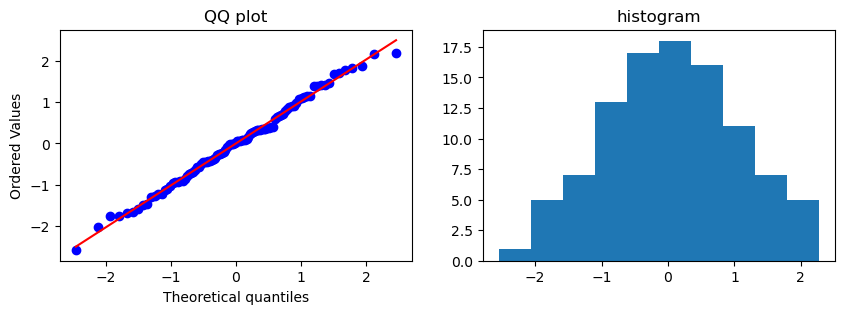

In [4]:
# 정규성 검정
from scipy.stats import shapiro, anderson, jarque_bera, kstest, zscore, probplot
# H0: 표본 모집단이 정규성을 만족한다, H1: 표본 모집단이 정규성을 만족하지 않는다.

#shapiro: n<50 추천
sstat, p = shapiro(data)
print('shapiro: {:.3f} (p {:.3f})'.format(sstat, p)) 

#darling anderson: n>50 추천 / 검정 통계량 < 임계값 시, 정규성 가정 만족
dstat, cv, sl = anderson(data, dist='norm')
print('anderson: {:.3f} (임계치 {:.3f}, 유의수준 {:.2f})'.format(dstat, cv[2], sl[2]*0.01))

#kstest(콜모고로프 스미르노프): 대규모
kstat, p = kstest(data, cdf = norm.cdf)
print('kstest_normal: {:.3f} (p {:.3f})'.format(kstat, p)) 

#jarque_bera: 검정통계량, p-value, 왜도(skew), 첨도(kurtosis)를 반환
jstat, p = jarque_bera(data)
print('jarque_bera: {:.3f} (p {:.3f})\n'.format(jstat, p)) 

#QQ Plot and histogram
from matplotlib import pyplot as plt
zdata = zscore(data)
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

# QQ plot: 데이터들이 대각선에 붙어 있을 수록 정규성을 만족하는 것으로 본다.
(osm, odr), (slope, intercept, r) = probplot(zdata, plot=ax[0])
ax[0].set_title('QQ plot')

# histogram
ax[1].hist(data)
ax[1].set_title('histogram')
plt.show()

## 모든 검정에서 정규성을 만족하는 것으로 나왔다.

#### k표본 등분산 검정 (Levene): 정규성 불만족 시, 활용

In [6]:
# 표본 수가 동일한 Levene 검정
from pandas import DataFrame
import numpy as np
data = DataFrame({"fac1":[48, 54, 57, 54, 62], 'fac2':[73,63,66,64,74], 'fac3':[51,63,61,54,56]})
test_a = 0.05
# H0: 모든 그룹들의 모분산은 동일하다, H1: 그룹들 중 적어도 한 그룹의 모분산이 동일하지 않다.

# 수기 검정
n1 = len(data['fac1'])
n2 = len(data['fac2'])
n3 = len(data['fac3'])
N = n1+n2+n3 #총표본수
k = data.shape[1]#시료 그룹의 수 (수준수)
df1 = k-1 #모집단 자유도
df2 = N-k #오차 자유도
df3 = N-1 #전체 자유도

means = np.array(data.mean(axis=0)) #모집단별 평균, 각 수준의 평균
zij1 = np.abs(data['fac1']-means[0])
zij2 = np.abs(data['fac2']-means[1])
zij3 = np.abs(data['fac3']-means[2])
zi1 = zij1.mean()
zi2 = zij2.mean()
zi3 = zij3.mean()
z = (zij1.sum()+zij2.sum()+zij3.sum())/(len(zij1)+len(zij2)+len(zij3))
#z = 전체 zij의 평균

F = (N-k) / (k-1) * ( n1*(zi1-z)**2 + n2*(zi2-z)**2 + n3*(zi3-z)**2) / sum( (zij1-zi1)**2 + (zij2-zi2)**2 + (zij3-zi3)**2 )
    
from scipy.stats import f
cv = f.ppf(1-test_a, df1, df2) #cv보다 크면 기각
sp = 1-f.cdf(F, df1, df2)

print("[수기 검정]") #귀무가설을 기각할 수 없음!
print(" 오른쪽 검정의 임계값: {:.3f}, 검정통계량: {:.3f}".format(cv, F))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))

[수기 검정]
 오른쪽 검정의 임계값: 3.885, 검정통계량: 0.145
 유의수준: 0.050, 유의확률: 0.867


In [8]:
# 라이브러리 검정: 표본 수가 같든지 다르든지 상관이 없다.
from scipy.stats import levene
lstat, p = levene(data['fac1'], data['fac2'], data['fac3'], center='mean')
print("[라이브러리 검정]") #귀무가설 기각 불가 --> 등분산성 만족
print(" stat {:.3f}, p-value {:.3f}".format(lstat, p)) 

[라이브러리 검정]
 stat 0.145, p-value 0.867


In [9]:
# 표본 수가 다른 Levene 검정
from pandas import DataFrame
data = [[36,41,42,49], [40,48,39,45,44], [35,37,42,34,32]]
test_a = 0.05

means = [] #모집단(수준)별 평균
N = 0 #표본 전체 개수
k_sample_n = [] #모집단(수준) 별 표본개수
for d in data:
    means.append(np.mean(d))
    N += len(d)
    k_sample_n.append(len(d))
k_sample_n = np.array(k_sample_n)

k = len(k_sample_n) #수준의 수
n1 = k_sample_n[0]
n2 = k_sample_n[1]
n3 = k_sample_n[2]
df3 = N-1 #전체 자유도
df1 = k-1 #모집단 자유도
df2 = N-k #오차 자유도
zij1 = np.abs(data[0]-means[0])
zij2 = np.abs(data[1]-means[1])
zij3 = np.abs(data[2]-means[2])
zi1 = zij1.mean()
zi2 = zij2.mean()
zi3 = zij3.mean()
z = (zij1.sum()+zij2.sum()+zij3.sum())/(len(zij1)+len(zij2)+len(zij3))
#z = 전체 zij의 평균

F = (N-k) / (k-1) * ( n1*(zi1-z)**2 + n2*(zi2-z)**2 + n3*(zi3-z)**2) / ( sum((zij1-zi1)**2) + sum((zij2-zi2)**2) + sum((zij3-zi3)**2) )
    
from scipy.stats import f
cv = f.ppf(1-test_a, df1, df2) #cv보다 크면 기각
sp = 1-f.cdf(F, df1, df2)

print("[수기 검정]") #귀무가설을 기각할 수 없음!
print(" 오른쪽 검정의 임계값: {:.3f}, 검정통계량: {:.3f}".format(cv, F))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))

[수기 검정]
 오른쪽 검정의 임계값: 3.982, 검정통계량: 0.096
 유의수준: 0.050, 유의확률: 0.909


In [11]:
# 라이브러리 검정
from scipy.stats import levene
lstat, p = levene(data[0], data[1], data[2], center='mean')
print("[라이브러리 검정]") #귀무가설 기각 불가 --> 등분산성 만족
print(" stat {:.3f}, p-value {:.3f}".format(lstat, p))

[라이브러리 검정]
 stat 0.096, p-value 0.909


#### k표본 등분산 검정 (Bartlett): 정규성 만족 시, 활용

In [12]:
from scipy.stats import bartlett
# 정규성 샘플 생성
data1 = norm.rvs(size=50, random_state=0)
data2 = norm.rvs(size=50, random_state=1)
data3 = norm.rvs(size=50, random_state=2)

bstat, p = bartlett(data1, data2, data3)
print("[라이브러리 검정]")
print(" stat {:.3f}, p-value {:.3f}".format(bstat, p))

[라이브러리 검정]
 stat 1.082, p-value 0.582


### **5-4. 분산분석: F분포**

- 순서: 정규성/등분산성/독립성 검증 --> 분산분석 --> 사후검정
- 정규성 O, 등분산성 O, 샘플사이즈 동일 O  
  : standard ANOVA / Tukey HSD, snk, Dumnett, Duncan 등  
- 정규성 O, 등분산성 O, 샘플사이즈 동일 X  
  : standard ANOVA / Bonferroni, sidak, Fisher's LSD, Dumnett, Tukey HSD 등
- 정규성 O, 등분산성 X  
  : Welch's ANOVA, Brown-Forsythe ANOVA / GamesHowell, Dumnett T3 등  

#### 등분산 one-way ANOVA

In [4]:
# one-way ANOVA (수준 별 샘플 사이즈가 동일한 완전확률화계획법)
## 각 수준의 모집단이 정규분포를 따르고 분산이 동일하다고 가정한다.
from pandas import DataFrame

data = DataFrame({"A0":[76,80,78,79,83,74], 
                  'A1':[82,75,83,78,85,80], 
                  'A2':[79,87,88,86,84,82], 
                  'A3':[81,74,76,78,73,70]})

print("[데이터 확인]\n", data)

[데이터 확인]
    A0  A1  A2  A3
0  76  82  79  81
1  80  75  87  74
2  78  83  88  76
3  79  78  86  78
4  83  85  84  73
5  74  80  82  70


In [6]:
#H0: 모든 모집단의 평균이 동일하다
#H1: 모든 모집단 평균이 동일한 것은 아니다
import numpy as np
test_a = 0.05
means = np.array(data.mean(axis=0)) #모집단(수준)별 평균
mu = np.mean(data.values) #전체 평균
Vs = np.array(data.std(axis=0, ddof=1)**2) #모집단(수준)별 분산
n = len(data.values.flatten()) #표본 전체 개수
k = data.shape[0] #모집단 별 표본개수
level = data.shape[1] #모집단(수준)의 개수
dfr = level-1 #모집단(수준) 자유도
dfe = n - dfr -1 #오차 자유도

print("[수기 검정]")
print(" 수준별 평균\n", means)
print(" 수준별 표본의 분산\n", Vs)
print(" 자유도 {}, {}".format(dfr, dfe))

[수기 검정]
 수준별 평균
 [78.33333333 80.5        84.33333333 75.33333333]
 수준별 표본의 분산
 [ 9.86666667 13.1        11.46666667 15.06666667]
 자유도 3, 20


In [7]:
SSTR = (k * (means - mu)**2).sum() #처리제곱: 처리 평균들과 전체 평균의 제곱합 
SSE = ((k-1) * Vs).sum() #오차제곱: 처리분산들과 오차 자유도를 곱한 합
SST = ((data.values - mu)**2).sum() #SSTR + SSE
MSR = SSTR/dfr
MSE = SSE/dfe
F = MSR / MSE
print(" SSTR: {:.3f}, SSE: {:.3f}, SST: {:.3f}".format(SSTR, SSE, SST))
print(" MSR: {:.3f}, MSE: {:.3f}, F: {:.3f}".format(MSR, MSE, F))

 SSTR: 258.125, SSE: 247.500, SST: 505.625
 MSR: 86.042, MSE: 12.375, F: 6.953


In [8]:
from scipy.stats import f
cv = f.ppf(1-test_a, dfr, dfe)
sp = 1-f.cdf(F, dfr, dfe)
print(" 오른쪽 검정의 임계값: {:.3f}, 검정통계량: {:.3f}".format(cv, F))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))

 오른쪽 검정의 임계값: 3.098, 검정통계량: 6.953
 유의수준: 0.050, 유의확률: 0.002


In [14]:
print("[라이브러리 검정]")
from statsmodels.stats.oneway import anova_oneway
oa = anova_oneway(data=data.melt()['value'], 
                   groups=data.melt()['variable'],
                  use_var = 'equal') # use_var='equal': standard ANOVA, 'unequal': Welch's ANOVA, 'bf': Brown-Forsythe ANOVA
print(" stat: {:.3f}, p-value: {:.3f}".format(oa.statistic, oa.pvalue))

[라이브러리 검정]
 stat: 6.953, p-value: 0.002


In [15]:
# 사후 검정 (정규성 O, 등분산 O, 샘플 사이즈 동일 O - Tukey HSD)
print("[라이브러리 검정]")
from statsmodels.sandbox.stats.multicomp import MultiComparison
from scipy.stats import ttest_ind
org_data = data.melt()
print('data.melt: \n', org_data.head(3))

[라이브러리 검정]
data.melt: 
   variable  value
0       A0     76
1       A0     80
2       A0     78


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    A0     A1   2.1667  0.713   -3.518  7.8513  False
    A0     A2      6.0 0.0363   0.3153 11.6847   True
    A0     A3     -3.0  0.469  -8.6847  2.6847  False
    A1     A2   3.8333 0.2647  -1.8513   9.518  False
    A1     A3  -5.1667 0.0831 -10.8513   0.518  False
    A2     A3     -9.0 0.0014 -14.6847 -3.3153   True
-----------------------------------------------------


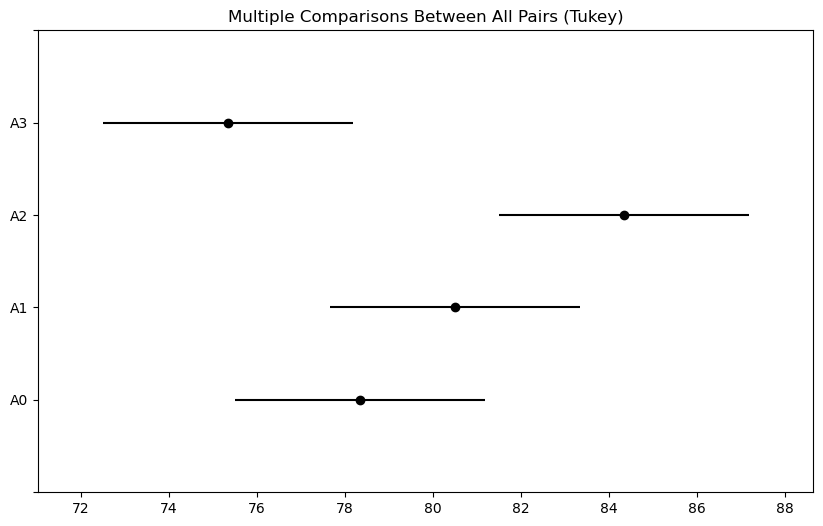

In [17]:
mc = MultiComparison(data = org_data['value'], 
                     groups = org_data['variable']).tukeyhsd(alpha=0.05)
print(mc)

import matplotlib.pyplot as plt
mc.plot_simultaneous()
plt.show()
## 사후 검정 결과, A0-A2, A2-A3 간의 모평균의 차이가 있는 것으로 확인하였다.
## meandiff는 각 그룹간 모평균 차의 점추정량이고, lower~uppwer는 모평균 차의 신뢰구간을 나타낸다.
## p-adj는 조정된 p-value로서 유의수준 0.05보다 적은 경우 reject True로 판명되어 귀무가설을 기각하게 된다.

In [18]:
# one-way ANOVA (수준 별 샘플 사이즈가 다른 완전확률화계획법)
## 각 수준의 모집단이 정규분포를 따르고 분산이 동일하다고 가정한다.
data = [[81,75,69,90,72,83],[65,80,73,79,81,69],[72,67,62,76,80],[89,94,79,88]]
data_df = DataFrame(data, index=['A%d' %i for i in range(len(data))]).T
data_1d = sum(data, []) # 1d list로 정렬
test_a = 0.05
print("[데이터 확인]\n", data_df)

[데이터 확인]
      A0    A1    A2    A3
0  81.0  65.0  72.0  89.0
1  75.0  80.0  67.0  94.0
2  69.0  73.0  62.0  79.0
3  90.0  79.0  76.0  88.0
4  72.0  81.0  80.0   NaN
5  83.0  69.0   NaN   NaN


In [19]:
#H0: 모든 모집단의 평균이 동일하다
#H1: 모든 모집단 평균이 동일한 것은 아니다
means = [] #모집단(수준)별 평균
Vs = [] #모집단(수준)별 분산
n = 0 #표본 전체 개수
k = [] #모집단(수준) 별 표본개수
for d in data:
    means.append(np.mean(d))
    Vs.append(np.std(d, ddof=1)**2)
    n += len(d)
    k.append(len(d))
mu = np.mean(data_1d) #전체 평균
Vs = np.array(Vs)
k = np.array(k)
dfr = len(k)-1 #모집단 자유도
dfe = n - 1 - dfr #오차 자유도
print("[수기 검정]")
print(" 수준 별 평균\n", means)
print(" 수준 별 표본의 분산\n", Vs)
print(" 자유도 {}, {}".format(dfr, dfe))

[수기 검정]
 수준 별 평균
 [78.33333333333333, 74.5, 71.4, 87.5]
 수준 별 표본의 분산
 [60.66666667 43.1        50.8        39.        ]
 자유도 3, 17


In [20]:
SSTR = (k * (means - mu)**2).sum() #처리제곱: 처리 평균들과 전체 평균의 오차제곱합 
SSE = ((k-1) * Vs).sum() #오차제곱: 처리분산들과 오차 자유도를 곱한 합
SST = ((data_1d - mu)**2).sum() #SSTR + SSE
MSR = SSTR/dfr
MSE = SSE/dfe
F = MSR / MSE
print(" SSTR: {:.3f}, SSE: {:.3f}, SST: {:.3f}".format(SSTR, SSE, SST))
print(" MSR: {:.3f}, MSE: {:.3f}, F: {:.3f}".format(MSR, MSE, F))

 SSTR: 643.633, SSE: 839.033, SST: 1482.667
 MSR: 214.544, MSE: 49.355, F: 4.347


In [21]:
from scipy.stats import f
cv = f.ppf(1-test_a, dfr, dfe)
sp = 1-f.cdf(F, dfr, dfe)

print(" 오른쪽 검정의 임계값: {:.3f}, 검정통계량: {:.3f}".format(cv, F))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))

 오른쪽 검정의 임계값: 3.197, 검정통계량: 4.347
 유의수준: 0.050, 유의확률: 0.019


In [22]:
print("[라이브러리 검정]")
from scipy.stats import f_oneway
oa = f_oneway(*data) # *는 리스트 바깥 괄호를 없앤다. 리스트 압축 해제 기능!
# 위와 동일: oa = f_oneway(data[0], data[1], data[2], data[3]) 
print(" stat: {:.3f}, p-value: {:.3f}".format(oa.statistic, oa.pvalue))

[라이브러리 검정]
 stat: 4.347, p-value: 0.019


In [38]:
print("[라이브러리 검정]")
from statsmodels.stats.oneway import anova_oneway
oa = anova_oneway(data=data_df.melt().dropna()['value'], 
                   groups=data_df.melt().dropna()['variable'],
                  use_var = 'equal')
print(" stat: {:.3f}, p-value: {:.3f}".format(oa.statistic, oa.pvalue))

[라이브러리 검정]
 stat: 4.347, p-value: 0.019


In [28]:
# 사후 검정 (정규성 O, 등분산 O, 샘플 사이즈 동일 X - Bonferroni)
print("[라이브러리 검정]")
from statsmodels.sandbox.stats.multicomp import MultiComparison
from scipy.stats import ttest_ind
org_data = data_df.melt().dropna()
print('data_df.melt: \n', org_data.head(3))

[라이브러리 검정]
data_df.melt: 
   variable  value
0       A0   81.0
1       A0   75.0
2       A0   69.0


In [49]:
mc = MultiComparison(data = org_data['value'], 
                     groups = org_data['variable']
                    ).allpairtest(testfunc = ttest_ind, method='bonf')
# method는 다중 검정에서 p-value를 조정하는 방식을 결정하며, 주요 옵션은 다음과 같습니다:
# 'bonf': 가장 보수적인 Bonferroni 방식.
# 'holm', 'sidak': 덜 보수적인 방식.
# 'fdr_bh', 'fdr_by': 거짓 발견율(FDR)을 제어하는 방식.

print(mc[0])
## 사후 검정 결과, 모든 집단의 모평균 차이가 없는 것으로 나타났다.

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
    A0     A1  0.9218 0.3783       1.0  False
    A0     A2  1.5262 0.1613    0.9678  False
    A0     A3 -1.9591 0.0858    0.5146  False
    A1     A2  0.7506 0.4721       1.0  False
    A1     A3 -3.1239 0.0141    0.0849  False
    A2     A3 -3.5486 0.0094    0.0562  False
---------------------------------------------


#### 이분산 one-way ANOVA

In [50]:
# 파라미터 use_var를 다르게 설정함으로써 다양한 분산분석이 가능하다.
#'equal':standard anova, 'unequal': Welch anova, 'bf':Brown-Forsythe
data = DataFrame({"A1":[76,80,78,79,83,74], 'A2':[82,75,83,78,85,80], 'A3':[79,87,88,86,84,82], 'A4':[81,74,76,78,73,70]})
print("[데이터 확인]\n", data)

[데이터 확인]
    A1  A2  A3  A4
0  76  82  79  81
1  80  75  87  74
2  78  83  88  76
3  79  78  86  78
4  83  85  84  73
5  74  80  82  70


In [51]:
# Welch's one-way ANOVA
from statsmodels.stats.oneway import anova_oneway
print(" [Welch's one-way ANOVA]")
welch = anova_oneway(data=data.melt()['value'], groups=data.melt()['variable'],
                  use_var = 'unequal')
print(" stat: {:.3f}, p: {:.3f}".format(welch.statistic, welch.pvalue))#대립가설 채택

 [Welch's one-way ANOVA]
 stat: 6.019, p: 0.011


In [52]:
# Brown-Forsythe one-way ANOVA
print(" [Brown-Forsythe one-way ANOVA]")
bf = anova_oneway(data=data.melt()['value'], 
                   groups=data.melt()['variable'], use_var = 'bf')
print(" stat: {:.3f}, p: {:.3f}".format(bf.statistic, bf.pvalue))#대립가설 채택

 [Brown-Forsythe one-way ANOVA]
 stat: 6.953, p: 0.002


In [53]:
# 사후 검정 (정규성 O, 등분산 X - GamesHowell)
from pingouin import pairwise_gameshowell
org_data = data.melt()
gw = pairwise_gameshowell(dv='value', between='variable', data=org_data)
print(gw) ## 사후 검정 결과, A1-A3, A3-A4 간의 모평균의 차이가 있는 것으로 확인함

    A   B    mean(A)    mean(B)      diff        se         T        df  \
0  A1  A2  78.333333  80.500000 -2.166667  1.956471 -1.107436  9.805651   
1  A1  A3  78.333333  84.333333 -6.000000  1.885618 -3.181981  9.944065   
2  A1  A4  78.333333  75.333333  3.000000  2.038518  1.471657  9.583173   
3  A2  A3  80.500000  84.333333 -3.833333  2.023473 -1.894432  9.955991   
4  A2  A4  80.500000  75.333333  5.166667  2.166667  2.384615  9.951485   
5  A3  A4  84.333333  75.333333  9.000000  2.102908  4.279788  9.819241   

       pval    hedges  
0  0.693488 -0.590196  
1  0.041365 -1.695801  
2  0.488889  0.784303  
3  0.289721 -1.009616  
4  0.143511  1.270854  
5  0.007620  2.280865  


### two-way ANOVA
H0: 변수 A에 따른 종속변수 값에는 차이가 없고,   
&nbsp;&nbsp;&nbsp; 변수 B에 따른 종속변수 값에도 차이가 없으며, A-B의 상호작용 효과가 없다  
    
**A. 모수인자-모수인자 (Fixed Factor)**
  1. 반복이 없는 이원배치 분산분석: '모수-모수인자' 조합별 데이터 수가 1개
  2. 반복이 있는 이원배치 분산분석: '모수-모수인자' 조합별 데이터 수가 2개 이상  
    - A,B 교호작용이 유의하면 주효과 검정 무의미하고 교호작용효과만 검정  
    - A,B 교호작용이 유의하지 않으면, 오차항에 풀링 후 주효과 검정  

**B. 모수인자-변량인자 (Random Factor)**
  1. 난괴법 or 확률화블럭계획법: '모수-변량인자' 조합별 데이터 수가 1개
  2. 반복이 있는 이원배치 혼합모형: '모수-변량인자' 조합별 데이터 수가 2개 이상  
    - A,B 교호작용이 유의할 때, 모수인자의 주효과 검정만 의미  
    - A,B 교호작용이 유의하지 않으면, 오차항에 풀링 후 모수인자의 주효과 검정  

#### 등분산 two-way ANOVA (모수인자-모수인자)

In [55]:
# 반복이 없는 이원배치 분산분석: 반복이 없으므로 교호작용 효과는 검출할 수 없다.
## A, B 모두 모수인자
from pandas import DataFrame, crosstab
data = DataFrame({"A":[1,2,3,1,2,3,1,2,3,1,2,3],
                 "B":[1,1,1,2,2,2,3,3,3,4,4,4],
                 "Y": [4,3,5,5,7,6,7,8,9,8,10,12]})
print("[데이터 확인]\n", crosstab(data['A'], data['B'], values=data['Y'], aggfunc=list))

[데이터 확인]
 B    1    2    3     4
A                     
1  [4]  [5]  [7]   [8]
2  [3]  [7]  [8]  [10]
3  [5]  [6]  [9]  [12]


In [56]:
n = len(data['Y'])
a = len(data['A'].value_counts()) #인자 A의 수준 개수
b = len(data['B'].value_counts()) #인자 B의 수준 개수
dfa = a-1
dfb = b-1
dfe = dfa*dfb
y_mean = data['Y'].mean() #전체 데이터의 평균
yi_mean = data.groupby('A').mean()['Y'].values #열평균, 인자 A별 평균
yj_mean = data.groupby('B').mean()['Y'].values #행평균, 인자 B별 평균
SST = sum((data['Y'] - y_mean)**2)
SSA = sum((yi_mean - y_mean)**2) * b
SSB = sum((yj_mean - y_mean)**2) * a
SSE = 0#오차 제곱합
yij_data= data['Y'].values.reshape(-1,a) #재배열한 raw data
for i in range(a): #인자A
    for j in range(b): #인자B
        SSE += (yij_data[j,i] - yi_mean[i] - yj_mean[j] + y_mean)**2
MSA = SSA / dfa
MSB = SSB / dfb
MSE = SSE / dfe

from pandas import DataFrame
from scipy.stats import f
atable1 = DataFrame({"요인":['A', 'B', 'E'], "DF":[dfa, dfb, dfe], "SS":[SSA, SSB, SSE], "MS":[MSA, MSB, MSE], "F":[MSA/MSE, MSB/MSE, '없음'], 'PV':[1-f.cdf(MSA/MSE, dfa, dfe), 1-f.cdf(MSB/MSE, dfb, dfe), '없음']})
print("[수기 검정]")
print("ANOVA Table:\n", atable1) ## A의 주효과 없음, B의 주효과 유의함

[수기 검정]
ANOVA Table:
   요인  DF    SS    MS     F        PV
0  A   2   8.0   4.0   4.0  0.078717
1  B   3  60.0  20.0  20.0  0.001586
2  E   6   6.0   1.0    없음        없음


In [57]:
print("[라이브러리 검정]")
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols("Y~C(A)+C(B)", data = data).fit()
atable2 = anova_lm(model)
print(atable2)
## A 그룹간의 차이는 없고, B 그룹간의 차이가 있는 것으로 나타났다.

[라이브러리 검정]
           df  sum_sq  mean_sq     F    PR(>F)
C(A)      2.0     8.0      4.0   4.0  0.078717
C(B)      3.0    60.0     20.0  20.0  0.001586
Residual  6.0     6.0      1.0   NaN       NaN


In [58]:
# 반복이 있는 이원배치 분산분석
## A, B 모두 모수인자
from pandas import DataFrame, crosstab
data = DataFrame(
    {"A":[1,1,1,2,2,2,3,3,3, 1,1,1,2,2,2,3,3,3, 1,1,1,2,2,2,3,3,3, 1,1,1,2,2,2,3,3,3],#열수준
     "B":[1,1,1,1,1,1,1,1,1, 2,2,2,2,2,2,2,2,2, 3,3,3,3,3,3,3,3,3, 4,4,4,4,4,4,4,4,4],#행수준
  "Y":[64,66,70,72,81,64,74,51,65, 65,63,58,57,43,52,47,58,67, 59,68,65,66,71,59,58,45,42, 58,50,49,57,61,53,53,59,38]})

print("[데이터 확인]\n", crosstab(data['A'], data['B'], values = data['Y'], aggfunc=list))

[데이터 확인]
 B             1             2             3             4
A                                                        
1  [64, 66, 70]  [65, 63, 58]  [59, 68, 65]  [58, 50, 49]
2  [72, 81, 64]  [57, 43, 52]  [66, 71, 59]  [57, 61, 53]
3  [74, 51, 65]  [47, 58, 67]  [58, 45, 42]  [53, 59, 38]


In [59]:
n = len(data['Y'])
a = len(data['A'].value_counts()) #인자 A의 수준 개수
b = len(data['B'].value_counts()) #인자 B의 수준 개수
r = data.groupby(['A', 'B']).count().iloc[0,0] #동일한 인자 A,B 조건 하 반복 실험횟수
dfa = a-1
dfb = b-1
dfab = dfa*dfb
dfe = n - a*b

y_mean = data['Y'].mean() #전체 데이터의 평균
yi_mean = data.groupby('A').mean()['Y'].values #열평균, 인자 A별 평균
yj_mean = data.groupby('B').mean()['Y'].values #행평균, 인자 B별 평균
yij_mean = data.groupby(['B', 'A']).mean().values.flatten().reshape(-1,a) #인자A-B 조합별 데이터 평균

SST = sum((data['Y'] - y_mean)**2) #전체 제곱합
SSA = sum((yi_mean-y_mean)**2) * b * r #A 처리제곱합
SSB = sum((yj_mean-y_mean)**2) * a * r #B 처리제곱합
ssab = 0 #아직 미완성
for i in range(a): #인자A(열)
    for j in range(b): #인자B(행)
        ssab += (yij_mean[j, i] - yi_mean[i] - yj_mean[j] + y_mean)**2
SSAB = ssab * r # 교호작용 제곱합
SSE = 0#오차 제곱합
yij_data= data['Y'].values.reshape(-1,a,r) #재배열한 raw data
for i in range(a): #인자A
    for j in range(b): #인자B
        SSE += sum((yij_data[j,i] - yij_mean[j, i])**2)

MSA = SSA / dfa
MSB = SSB / dfb
MSAB = SSAB / dfab
MSE = SSE / dfe

from pandas import DataFrame
from scipy.stats import f
atable1 = DataFrame({"요인":['A', 'B', 'AxB', 'E'], "DF":[dfa, dfb, dfab, dfe], "SS":[SSA, SSB, SSAB, SSE], "MS":[MSA, MSB, MSAB, MSE], "F":[MSA/MSE, MSB/MSE, MSAB/MSE, '없음'], 'PV':[1-f.cdf(MSA/MSE, dfa, dfe), 1-f.cdf(MSB/MSE, dfb, dfe), 1-f.cdf(MSAB/MSE, dfab, dfe), '없음']})

print("[수기 검정]")
print("ANOVA Table:\n", atable1)
# 교호작용이 유의하지 않으므로 이를 E에 풀링하고 A, B의 주효과를 확인해야 한다.

[수기 검정]
ANOVA Table:
     요인  DF           SS          MS         F        PV
0    A   2   342.388889  171.194444    3.0815  0.064393
1    B   3  1002.888889  334.296296  6.017333  0.003307
2  AxB   6   588.944444   98.157407  1.766833  0.148795
3    E  24  1333.333333   55.555556        없음        없음


In [60]:
pooled_SSE = SSAB+SSE
pooled_dfe = dfab+dfe
pooled_MSE = pooled_SSE / pooled_dfe

atable2 = DataFrame({"요인":['A', 'B', 'E'], "DF":[dfa, dfb, pooled_dfe], "SS":[SSA, SSB, pooled_SSE], "MS":[MSA, MSB, pooled_MSE], "F":[MSA/pooled_MSE, MSB/pooled_MSE, '없음'], 'PV':[1-f.cdf(MSA/pooled_MSE, dfa, pooled_dfe), 1-f.cdf(MSB/pooled_MSE, dfb, pooled_dfe), '없음']})
print("pooling 후, ANOVA Table:\n", atable2)
## 유의수준 0.05 기준으로 A의 수준별 모평균 차이는 통계적으로 유의하지 않지만, B의 수준별 모평균 차이는 통계적으로 유의한 것으로 나타났다. 이에 B의 수준별 사후검정을 할 필요가 있다. 

pooling 후, ANOVA Table:
   요인  DF           SS          MS         F        PV
0  A   2   342.388889  171.194444  2.671744  0.085542
1  B   3  1002.888889  334.296296   5.21719  0.005102
2  E  30  1922.277778   64.075926        없음        없음


In [61]:
print("[라이브러리 검정]")
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols("Y~C(A)+C(B)+C(A):C(B)", data = data).fit()
atable3 = anova_lm(model)
print(atable3) #유의수준 0.05 기준으로 A와 B의 교호작용이 유의하지 않은 것으로 확인함

[라이브러리 검정]
             df       sum_sq     mean_sq         F    PR(>F)
C(A)        2.0   342.388889  171.194444  3.081500  0.064393
C(B)        3.0  1002.888889  334.296296  6.017333  0.003307
C(A):C(B)   6.0   588.944444   98.157407  1.766833  0.148795
Residual   24.0  1333.333333   55.555556       NaN       NaN


In [62]:
model = ols("Y~C(A)+C(B)", data = data).fit()
atable4 = anova_lm(model)
print(atable4) #풀링 후 주효과 확인
## 유의수준 0.05 기준으로 B는 주효과가 있는 것으로 확인함

            df       sum_sq     mean_sq         F    PR(>F)
C(A)       2.0   342.388889  171.194444  2.671744  0.085542
C(B)       3.0  1002.888889  334.296296  5.217190  0.005102
Residual  30.0  1922.277778   64.075926       NaN       NaN


#### 등분산 two-way ANOVA (모수인자-변량인자)

In [63]:
# 반복이 없는 경우: 난괴법 혹은 확률화블럭계획법(RBD, randomized block design)
## A가 모수인자, B가 변량인자
# '반복이 없는 이원배치 분산분석'과 동일한 방법으로 진행한다.
from pandas import DataFrame, crosstab
data = DataFrame({"A":[1,2,3,1,2,3,1,2,3,1,2,3],
                 "B":[1,1,1,2,2,2,3,3,3,4,4,4],
                 "Y": [4,3,5,5,7,6,7,8,9,8,10,12]})

print("[데이터 확인]\n", crosstab(data['A'], data['B'], values = data['Y'], aggfunc=list))

[데이터 확인]
 B    1    2    3     4
A                     
1  [4]  [5]  [7]   [8]
2  [3]  [7]  [8]  [10]
3  [5]  [6]  [9]  [12]


In [64]:
n = len(data['Y'])
a = len(data['A'].value_counts()) #모수인자 A의 수준 개수
b = len(data['B'].value_counts()) #변량인자 B(=Block)의 수준 개수
dfa = a-1
dfb = b-1
dfe = dfa*dfb
y_mean = data['Y'].mean() #전체 데이터의 평균
yi_mean = data.groupby('A').mean()['Y'].values #열평균, 인자 A별 평균
yj_mean = data.groupby('B').mean()['Y'].values #행평균, 인자 B별 평균
SST = sum((data['Y'] - y_mean)**2)
SSA = sum((yi_mean - y_mean)**2) * b
SSB = sum((yj_mean - y_mean)**2) * a
SSE = 0 #오차 제곱합
yij_data= data['Y'].values.reshape(-1,a) #재배열한 raw data
for i in range(a): #인자A
    for j in range(b): #인자B
        SSE += (yij_data[j,i] - yi_mean[i] - yj_mean[j] + y_mean)**2
MSA = SSA / dfa
MSB = SSB / dfb
MSE = SSE / dfe

from pandas import DataFrame
from scipy.stats import f
atable1 = DataFrame({"요인":['A', 'B', 'E'], "DF":[dfa, dfb, dfe], "SS":[SSA, SSB, SSE], "MS":[MSA, MSB, MSE], "F":[MSA/MSE, MSB/MSE, '없음'], "PV": [1-f.cdf(MSA/MSE, dfa, dfe), 1-f.cdf(MSB/MSE, dfb, dfe), '없음']})

print("[수기 검정]")
print("ANOVA Table:\n", atable1)
print(" B 변량의 분산 추정치: {:.3f}".format((MSB-MSE)/a))

[수기 검정]
ANOVA Table:
   요인  DF    SS    MS     F        PV
0  A   2   8.0   4.0   4.0  0.078717
1  B   3  60.0  20.0  20.0  0.001586
2  E   6   6.0   1.0    없음        없음
 B 변량의 분산 추정치: 6.333


In [65]:
print("[라이브러리 검정]")
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols("Y~C(A)+C(B)", data = data).fit()
atable2 = anova_lm(model)
print(atable2)
## 모수인자 A는 주효과 검정 결과 유의하지 않고, 
## 변량인자 B는 주효과 검정 대신 모분산을 추정한다.

[라이브러리 검정]
           df  sum_sq  mean_sq     F    PR(>F)
C(A)      2.0     8.0      4.0   4.0  0.078717
C(B)      3.0    60.0     20.0  20.0  0.001586
Residual  6.0     6.0      1.0   NaN       NaN


In [66]:
# 반복이 있는 경우: 이원배치 혼합모형(mixed model)
## A가 모수인자, B가 변량인자
from pandas import DataFrame, crosstab
data = DataFrame(
    {"A":[1,1,1,2,2,2,3,3,3, 1,1,1,2,2,2,3,3,3, 1,1,1,2,2,2,3,3,3, 1,1,1,2,2,2,3,3,3],#열수준
     "B":[1,1,1,1,1,1,1,1,1, 2,2,2,2,2,2,2,2,2, 3,3,3,3,3,3,3,3,3, 4,4,4,4,4,4,4,4,4],#행수준
  "Y":[64,66,70,72,81,64,74,51,65, 65,63,58,57,43,52,47,58,67, 59,68,65,66,71,59,58,45,42, 58,50,49,57,61,53,53,59,38]})

print("[데이터 확인]\n", crosstab(data['A'], data['B'], values = data['Y'], aggfunc=list))

[데이터 확인]
 B             1             2             3             4
A                                                        
1  [64, 66, 70]  [65, 63, 58]  [59, 68, 65]  [58, 50, 49]
2  [72, 81, 64]  [57, 43, 52]  [66, 71, 59]  [57, 61, 53]
3  [74, 51, 65]  [47, 58, 67]  [58, 45, 42]  [53, 59, 38]


In [67]:
n = len(data['Y'])
a = len(data['A'].value_counts()) #인자 A의 수준 개수
b = len(data['B'].value_counts()) #인자 B의 수준 개수
r = data.groupby(['A', 'B']).count().iloc[0,0] #동일한 인자 A,B 조건 하 반복 실험횟수
dfa = a-1
dfb = b-1
dfab = dfa*dfb
dfe = n - a*b

y_mean = data['Y'].mean() #전체 데이터의 평균
yi_mean = data.groupby('A').mean()['Y'].values #열평균, 인자 A별 평균
yj_mean = data.groupby('B').mean()['Y'].values #행평균, 인자 B별 평균
yij_mean = data.groupby(['B', 'A']).mean().values.flatten().reshape(-1,a) #인자A-B 조합별 데이터 평균

SST = sum((data['Y'] - y_mean)**2) #전체 제곱합
SSA = sum((yi_mean-y_mean)**2) * b * r #A 처리제곱합
SSB = sum((yj_mean-y_mean)**2) * a * r #B 처리제곱합
ssab = 0 #아직 미완성
for i in range(a): #인자A(열)
    for j in range(b): #인자B(행)
        ssab += (yij_mean[j, i] - yi_mean[i] - yj_mean[j] + y_mean)**2
SSAB = ssab * r # 교호작용 제곱합
SSE = 0#오차 제곱합
yij_data= data['Y'].values.reshape(-1,a,r) #재배열한 raw data
for i in range(a): #인자A
    for j in range(b): #인자B
        SSE += sum((yij_data[j,i] - yij_mean[j, i])**2)
MSA = SSA / dfa
MSB = SSB / dfb
MSAB = SSAB / dfab
MSE = SSE / dfe

from pandas import DataFrame
# 모수인자 A의 통계량을 계산할 때 MSA/MSAB를 사용한다.
atable1 = DataFrame({"요인":['A', 'B', 'AxB', 'E'], "DF":[dfa, dfb, dfab, dfe], "SS":[SSA, SSB, SSAB, SSE], "MS":[MSA, MSB, MSAB, MSE], "F":[MSA/MSAB, MSB/MSE, MSAB/MSE, '없음']})

from scipy.stats import f
print("[수기 검정]")
print("ANOVA Table:\n", atable1.round(1))
print(" A-B 교호작용 검정: {:.3f}, p-value {:.3f}".format(MSAB/MSE, 1-f.cdf(MSAB/MSE, dfab, dfe)))
print(" B 변량의 분산 추정: {:.3f}".format((MSB-MSE)/(a*r)))

[수기 검정]
ANOVA Table:
     요인  DF      SS     MS         F
0    A   2   342.4  171.2  1.744081
1    B   3  1002.9  334.3  6.017333
2  AxB   6   588.9   98.2  1.766833
3    E  24  1333.3   55.6        없음
 A-B 교호작용 검정: 1.767, p-value 0.149
 B 변량의 분산 추정: 30.971


In [68]:
pooled_SSE = SSAB+SSE
pooled_dfe = dfab+dfe
pooled_MSE = pooled_SSE / pooled_dfe

atable2 = DataFrame({"요인":['A', 'B', 'E'], "DF":[dfa, dfb, pooled_dfe], "SS":[SSA, SSB, pooled_SSE], "MS":[MSA, MSB, pooled_MSE], "F":[MSA/pooled_MSE, MSB/pooled_MSE, '없음']})
print("pooling 후, ANOVA Table:\n", atable2.round(1))
print(" A 주효과 검정: {:.3f}, p-value {:.3f}".format(MSA/pooled_MSE, 1-f.cdf(MSA/pooled_MSE, dfa, pooled_dfe)))

pooling 후, ANOVA Table:
   요인  DF      SS     MS         F
0  A   2   342.4  171.2  2.671744
1  B   3  1002.9  334.3   5.21719
2  E  30  1922.3   64.1        없음
 A 주효과 검정: 2.672, p-value 0.086


In [73]:
# 라이브러리 활용 시도. but 정확히 재현하지 못함

import pingouin as pg
# 피험자 ID 컬럼 생성 (B와 중복되지 않게)
data['Subject_ID'] = data.groupby('B').cumcount() + 1  # B별로 1,2,3,... 할당
aov = pg.mixed_anova(data=data, dv='Y', between='A', within='B', subject='Subject_ID')
print(aov)

        Source           SS  DF1  DF2          MS         F     p-unc  \
0            A   342.388889    2    6  171.194444  5.654128  0.041658   
1            B  1002.888889    3   18  334.296296  5.224891  0.009034   
2  Interaction   588.944444    6   18   98.157407  1.534153  0.223496   

        np2       eps  
0  0.653345       NaN  
1  0.465474  0.677438  
2  0.338355       NaN  


In [76]:
import pandas as pd
from statsmodels.formula.api import mixedlm

model = mixedlm(
    formula='Y ~ A',          # 고정효과: A (모수인자)
    groups='B',               # 랜덤효과: B (변량인자)
    re_formula='~A',          # A의 랜덤 기울기 포함
    data=data
)
result = model.fit()
print(result.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Y        
No. Observations: 36      Method:             REML     
No. Groups:       4       Scale:              62.5782  
Min. group size:  9       Log-Likelihood:     -126.1181
Max. group size:  9       Converged:          No       
Mean group size:  9.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    65.611    4.395 14.928 0.000 56.997 74.225
A            -3.250    2.818 -1.153 0.249 -8.774  2.274
B Var        28.598    7.767                           
B x A Cov   -14.955    3.246                           
A Var        21.343                                    



C:\Users\sunwa\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sunwa\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\Users\sunwa\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sunwa\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
C:\Users\sunwa\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

#### 연습문제 #1

In [12]:
# 모분산 정보가 없을 경우 --> t분포
import numpy as np
from scipy.stats import t
data = [10, 19, 15, 11, 13, 14, 18]
x = np.mean(data)
s = np.std(data, ddof=1)
n = len(data)
df = n-1
SE = S / np.sqrt(n)
conf_a = 0.05
conf_z = t.ppf(1-conf_a/2, df)
print('confidence interval: {:.3f} ~ {:.3f}'.format (mu - conf_z * SE, mu + conf_z * SE))

# 모표준편차가 3인 경우 --> Z분포
from scipy.stats import norm
sigma = 3
SE2 = sigma / np.sqrt(n)
conf_z = norm.ppf(1-conf_a/2)
print('confidence interval: {:.3f} ~ {:.3f}'.format (mu - conf_z * SE2, mu + conf_z * SE2))

confidence interval: 11.185 ~ 17.386
confidence interval: 12.063 ~ 16.508


#### 연습문제 #2

In [19]:
from scipy.stats import norm
p = 0.05
conf_a = 0.05
SE = np.sqrt(p*(1-p)/n)
conf_z = norm.ppf(1-conf_a/2)
ME = 0.03  # ME = conf_z * SE
n = conf_z**2 * p*(1-p) / ME**2
print(n)

202.74365998107885


#### 연습문제 #3

In [21]:
from scipy.stats import chi2
v = 50
n = 30
df = n-1
conf_a = 0.05
conf_c1 = chi2.ppf(1-conf_a/2, df)
conf_c2 = chi2.ppf(conf_a/2, df)
CR1 = df * v / conf_c1 
CR2 = df * v / conf_c2 

print(" 점 추정량: {:.2f}".format(v))
print(" 구간 추정량: {:.2f}~{:.2f}".format(CR1, CR2))


 점 추정량: 50.00
 구간 추정량: 31.71~90.36


#### 연습문제 #4

In [23]:
from scipy.stats import norm
p = 5/20
conf_a = 0.05
n = 20
SE = np.sqrt(p*(1-p)/n)
conf_z = norm.ppf(1-conf_a/2)
print('confidence interval: {:.3f} ~ {:.3f}'.format (p - conf_z * SE, p + conf_z * SE))

confidence interval: 0.060 ~ 0.440


#### 연습문제 #5

In [26]:
P0 = 0.35
n = 450
x = 180
p = x / n
test_a = 0.05
SE = np.sqrt(P0 * (1-P0)/n)
zstat = (p - P0)/SE
# 귀무가설: 성인 남성의 흡연율은 35%와 차이가 없다.
# 대립가설: 성인 남성의 흡연율은 35%보다 높다.

from scipy.stats import norm
sp = 1-norm.cdf(zstat)  # 우측 검정 진행 (mu > mu0)
cv = norm.ppf(1-test_a)

print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, zstat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))
# 유의확률 0.013으로 유의수준 0.05보다 낮아 귀무가설 기각. 즉, 흡연률은 35%보다 높음

 임계값: 1.6448536269514722, 검정통계량: 2.224
 유의수준: 0.050, 유의확률: 0.013


#### 연습문제 #6

In [32]:
v0 = 10
v = 8.8
n = 50
df = n-1
test_a = 0.05
cstat = df * v / v0
# 귀무가설: 모분산은 10과 차이가 없다.
# 대립가설: 모분산은 10과 차이가 있다.

from scipy.stats import chi2
if chi2.cdf(cstat, df) < 0.5:
    sp = (chi2.cdf(cstat, df))*2
else:
    sp = (1-chi2.cdf(cstat, df))*2
cv1 = chi2.ppf(test_a/2, df)
cv2 = chi2.ppf(1-test_a/2, df)
cv = "{:.3f}~{:.3f}".format(cv1, cv2)
print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, cstat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))
# 유의확률 높아 귀무가설 기각 불가. 즉, 모분산은 10과 차이가 없다.

 임계값: 31.555~70.222, 검정통계량: 43.120
 유의수준: 0.050, 유의확률: 0.581


#### 연습문제 #7

In [37]:
D = 15
D0 = 0
Std_D = 4
n = 50
test_a = 0.05
# 귀무가설: 신약 투약 이전과 이후의 혈당차이가 나지 않는다. (전후 혈당 차이가 0이다.)
# 대립가설: 신약 투약 이전과 이후의 혈당차이가 난다. (전후 혈당 차이가 0이 아니다.)

from scipy.stats import norm
zstat = (D - D0)/ (Std_D / np.sqrt(n))

sp = (1-norm.cdf(np.abs(zstat)))*2 # 유의확률(significance probability)
cv = norm.ppf(1-test_a/2) # 임계값 (critical value)
cv = "+/-{:.3f}".format(cv)

print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, zstat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))
# 귀무가설 기각. 즉, 전후 혈당 차이 있다.

 임계값: +/-1.960, 검정통계량: 26.517
 유의수준: 0.050, 유의확률: 0.000


#### 연습문제 #8

In [41]:
import statsmodels.api as sm
# 귀무가설: 남녀 지지율은 차이가 없다, 대립가설: 남녀 지지율은 차이가 있다

count = np.array([100*0.3, 180*0.35])  # 각 그룹의 성공 횟수
nobs = np.array([100, 180])  # 각 그룹의 총 관측치
stat, pval = sm.stats.proportions_ztest(count, nobs, alternative='two-sided')
print(stat,pval)
# 검정통계량의 유의확률이 유의수준인 0.05보다 크기 때문에 귀무가설을 기각할 수 없다.
# 즉, 남녀 지지율은 차이가 없다.

-0.8511831054314234 0.3946676461708256


#### 연습문제 #9

In [50]:
n1 = 14
x1 = 100
s1 = 5
n2 = 12
x2 = 110
s2 = 6
test_a = 0.05

# 귀무가설: A, B 두 브랜드 제품의 무게 평균 차이가 없다.
# 대립가설: A, B 두 브랜드 제품의 무게 평균 차이가 있다.

import numpy as np
from scipy.stats import t
df = ((s1**2)/n1 + (s2**2)/n2)**2 / (1/(n1-1)*((s1**2)/n1)**2 + 1/(n2-1)*((s2**2/n2)**2))
tstat = (x1-x2-0) / np.sqrt(s1**2/n1 + s2**2/n2)

sp = (1-t.cdf(np.abs(tstat), df))*2
cv = t.ppf(1-test_a/2, df)
cv = "+/-{:.3f}".format(cv)

print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, tstat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))
# 귀무가설 기각. 즉, 전후 혈당 차이 있다.

 임계값: +/-2.076, 검정통계량: -4.571
 유의수준: 0.050, 유의확률: 0.000


#### 연습문제 #10

In [51]:
from sklearn.datasets import load_iris
from pandas import DataFrame
import numpy as np
load = load_iris()
feature_names = list(map(lambda x: x.replace("(cm)", "").replace(' ', ''), load['feature_names']))
data = DataFrame(np.c_[load['data'], load['target']], columns = feature_names+['target'])
data['target'] = data['target'].map({0:load['target_names'][0], 1:load['target_names'][1], 2:load['target_names'][2]})
print(data.head(3))

   sepallength  sepalwidth  petallength  petalwidth  target
0          5.1         3.5          1.4         0.2  setosa
1          4.9         3.0          1.4         0.2  setosa
2          4.7         3.2          1.3         0.2  setosa


In [53]:
data['target'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

anderson: 0.889 (임계치 0.767, 유의수준 0.05)


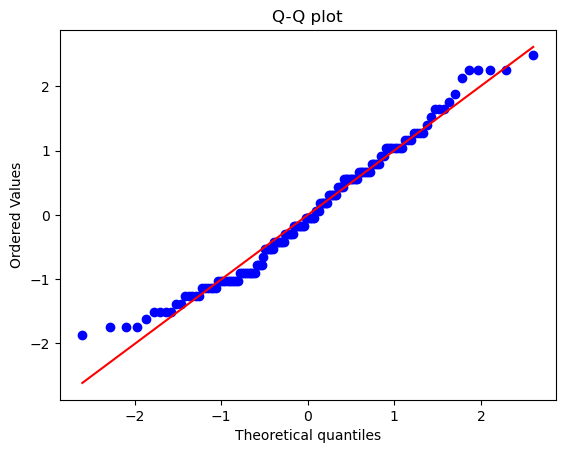

In [76]:
# 1. 정규성 검정
from scipy.stats import anderson, zscore, probplot
dstat, cv, sl = anderson(data['sepallength'], dist='norm')
print('anderson: {:.3f} (임계치 {:.3f}, 유의수준 {:.2f})'.format(dstat, cv[2], sl[2]*0.01))
# H0: 표본 모집단이 정규성을 만족한다, H1: 표본 모집단이 정규성을 만족하지 않는다.
# 검증통계량이 임계치보다 높으므로 귀무가설 기각할 수 없음. 즉, 정규성이 있음

from matplotlib import pyplot as plt
zdata = zscore(data['sepallength'])
fig = plt.figure()
probplot(zdata, dist='norm', plot=plt)
plt.title('Q-Q plot')
plt.show()

In [104]:
# 2. 등분산성 가정
import pandas as pd
data1 = data[data['target']=='setosa']['sepallength']
data2 = data[data['target']=='versicolor']['sepallength']
data3 = data[data['target']=='virginica']['sepallength']

from scipy.stats import bartlett
bstat, p = bartlett(data1, data2, data3)
print(" stat {:.3f}, p-value {:.3f}".format(bstat, p))

# H0: 모든 그룹들의 모분산은 동일하다, H1: 그룹들 중 적어도 한 그룹의 모분산이 동일하지 않다.
# p-value가 낮으므로 귀무가설 기각. 즉, 등분산성이 없음

 stat 16.006, p-value 0.000


In [103]:
# 3. 분산분석: 독립성은 있다고 가정하고, 정규성 O / 등분산성 X 이므로 Welch's ANOVA
# 귀무가설: target 수준들 간 데이터의 sepal length는 차이가 없다
# 대립가설: 적어도 한쌍의 수준들 간 데이터의 sepal length 평균은 차이가 있다. 
from statsmodels.stats.oneway import anova_oneway
welch = anova_oneway(data=data['sepallength'], groups=data['target'],
                  use_var = 'unequal')
print(" stat: {:.3f}, p: {:.3f}".format(welch.statistic, welch.pvalue))

# 검정통계량의 유의확률이 유의수준인 0.05보다 작기 때문에 귀무가설을 기각할 수 있다.
# 즉, 적어도 한쌍의 수준들 간 데이터의 sepal length 평균은 차이가 있다.

 stat: 138.908, p: 0.000


In [108]:
# 4. 사후검정: GamesHowell (정규성 O, 등분산 X)
from pingouin import pairwise_gameshowell
gw = pairwise_gameshowell(dv='sepallength', between='target', data=data)
print(gw)

# 사후검정 결과 모든 target 쌍의 sepal length가 다르다

            A           B  mean(A)  mean(B)   diff        se          T  \
0      setosa  versicolor    5.006    5.936 -0.930  0.088395 -10.520986   
1      setosa   virginica    5.006    6.588 -1.582  0.102819 -15.386196   
2  versicolor   virginica    5.936    6.588 -0.652  0.115825  -5.629165   

          df          pval    hedges  
0  86.538002  1.110223e-16 -2.088053  
1  76.515867  7.771561e-16 -3.053629  
2  94.025486  5.572540e-07 -1.117195  
